# Workshop I



# 1

## Simulate any random rectangular matrix A.*
- What is the rank and trace of A?
- What is the determinant of A?


In [5]:
import numpy as np

# Generate a random 4x3 matrix A
A = np.random.rand(4, 3)

print("Matrix A:")
print(A)

# Calculate the rank of A
rank_A = np.linalg.matrix_rank(A)
print("Rank of A:", rank_A)

# Calculate the trace of A
trace_A = np.trace(A)
print("Trace of A:", trace_A)

Matrix A:
[[0.8959109  0.51242489 0.93396401]
 [0.01813707 0.1225346  0.47482525]
 [0.62577053 0.03515601 0.39476581]
 [0.28634707 0.28759669 0.77163099]]
Rank of A: 3
Trace of A: 1.413211310487998


In [6]:
# Calcular el determinante de A (si es posible)
try:
    det_A = np.linalg.det(A)
    print("Determinante de A:", det_A)
except np.linalg.LinAlgError:
    print("La matriz A no es cuadrada, no se puede calcular el determinante.")


La matriz A no es cuadrada, no se puede calcular el determinante.


In [7]:
# Calcular los valores y vectores propios de A' * A
eigenvalues_AAt, eigenvectors_AAt = np.linalg.eig(np.dot(A.T, A))

# Calcular los valores y vectores propios de A * A'
eigenvalues_AtA, eigenvectors_AtA = np.linalg.eig(np.dot(A, A.T))

print("Valores propios de A' * A:", eigenvalues_AAt)
print("Vectores propios de A' * A:", eigenvectors_AAt)

print("Valores propios de A * A':", eigenvalues_AtA)
print("Vectores propios de A * A':", eigenvectors_AtA)


Valores propios de A' * A: [3.22637992 0.22797939 0.03275339]
Vectores propios de A' * A: [[ 0.5913949   0.80608012  0.02206608]
 [ 0.31675036 -0.20705066 -0.9256345 ]
 [ 0.74156678 -0.55440496  0.37777487]]
Valores propios de A * A': [ 3.22637992e+00  2.27979394e-01  3.27533936e-02 -4.48421808e-17]
Vectores propios de A * A': [[ 0.77092463  0.20584203 -0.56205855 -0.21770269]
 [ 0.22361143 -0.57384828  0.36664481 -0.69732895]
 [ 0.3752108   0.58282383  0.72052169  0.01953815]
 [ 0.46356229 -0.53725562  0.17467187  0.6826098 ]]



Los valores propios (eigenvalues) y vectores propios (eigenvectors) de ATA y AAT están relacionados de la siguiente manera:


###Relación entre los valores propios:

Los valores propios de ATA y AAT son los mismos, excepto por la posibilidad de que AAT tenga valores propios adicionales cero debido a su dimensión más grande. Esto se debe a que ATA y AAT
son matrices cuadradas y simétricas y, por lo tanto, comparten los mismos valores propios.

###Relación entre los vectores propios:

Los vectores propios correspondientes a los mismos valores propios pueden ser diferentes para ATA y
AAT.Aunque comparten los mismos valores propios, los vectores propios correspondientes pueden apuntar en diferentes direcciones.


Una diferencia clave es que ATA y AAT tienen diferentes tamaños y, por lo tanto, pueden tener diferentes números de valores propios no nulos.
Los vectores propios de ATA representan las direcciones principales de variación en las columnas de A, mientras que los vectores propios de AAT
representan las direcciones principales de variación en las filas de A.

En algunas aplicaciones, como el análisis de componentes principales (PCA), se prefiere utilizar ATA para encontrar las principales direcciones de variación en los datos, mientras que en otras aplicaciones, como la compresión de imágenes, AAT puede ser más útil.

En resumen, aunque los valores propios son los mismos, los vectores propios pueden diferir, y las matrices ATA y AAT pueden ofrecer información valiosa sobre la estructura y la variabilidad de los datos en diferentes contextos.

# 2

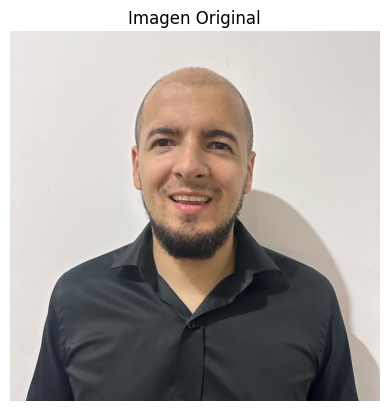

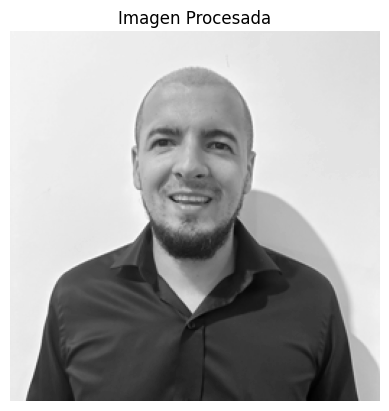

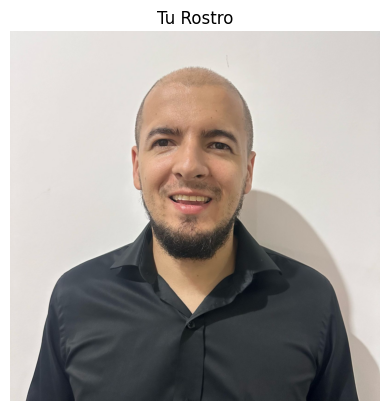

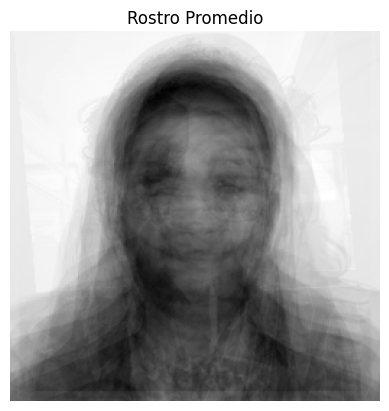

Distancia entre tu rostro y el rostro promedio: 20729.340029707066


In [12]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

# Cargar la imagen desde la biblioteca content de Colab
imagen_colab = Image.open('/content/drive/MyDrive/Juan villada.jpeg')

# Convertir la imagen a escala de grises
imagen_grayscale = imagen_colab.convert('L')

# Redimensionar a 256x256
imagen_redimensionada = imagen_grayscale.resize((256, 256))

# Mostrar la imagen original
plt.imshow(np.asarray(imagen_colab), cmap='gray')
plt.title('Imagen Original')
plt.axis('off')
plt.show()

# Mostrar la imagen en escala de grises y redimensionada
plt.imshow(np.asarray(imagen_redimensionada), cmap='gray')
plt.title('Imagen Procesada')
plt.axis('off')
plt.show()

# Guardar la imagen procesada
imagen_redimensionada.save('/content/imagen_procesada.jpg')

# Directorio donde se encuentran las imágenes de los compañeros
directorio_imagenes = "/content/drive/MyDrive/compañeros"

# Lista para almacenar las imágenes preprocesadas
imagenes = []

# Preprocesar todas las imágenes de los compañeros
for nombre_archivo in os.listdir(directorio_imagenes):
    ruta_imagen = os.path.join(directorio_imagenes, nombre_archivo)
    imagen = Image.open(ruta_imagen)
    imagen_grayscale = imagen.convert('L')
    imagen_redimensionada = imagen_grayscale.resize((256, 256))
    imagenes.append(np.array(imagen_redimensionada))

# Convertir la lista de imágenes a un array de NumPy
imagenes = np.array(imagenes)

# Mostrar tu rostro original
plt.imshow(np.asarray(imagen_colab), cmap='gray')
plt.title('Tu Rostro')
plt.axis('off')
plt.show()

# Calcular el rostro promedio
rostro_promedio = np.mean(imagenes, axis=0)

# Mostrar el rostro promedio
plt.imshow(rostro_promedio, cmap='gray')
plt.title('Rostro Promedio')
plt.axis('off')
plt.show()

# Calcular la distancia entre tu rostro y el rostro promedio (puedes usar la distancia euclidiana)
distancia = np.linalg.norm(np.array(imagen_redimensionada) - rostro_promedio)
print("Distancia entre tu rostro y el rostro promedio:", distancia)


#### Primero se procesa imagen facial original convirtiéndola a escala de grises y redimensionándola a 256x256 píxeles para una comparación uniforme con las imágenes de mis compañeros. Luego, calculé y visualicé el rostro promedio del grupo, lo que permitió identificar rasgos faciales comunes. Al calcular la distancia euclidiana entre mi rostro procesado y el rostro promedio, encontré una diferencia significativa de aproximadamente 20729.34, indicando que mi rostro posee características distintivas en comparación con el promedio del grupo.

# 3

In [13]:
# Instalación de Pipenv (si no está instalado ya)
!pip install pipenv

# Creación de un entorno virtual con Pipenv
!pipenv --python 3.8
!pipenv shell

# Instalación de las dependencias necesarias
!pipenv install numpy scikit-learn

# Creamos la estructura del paquete
!mkdir unsupervised_learning
!touch unsupervised_learning/__init__.py
!touch unsupervised_learning/svd.py
!touch unsupervised_learning/pca.py
!touch unsupervised_learning/tsne.py


Launching subshell in virtual environment...
/content#  . /root/.local/share/virtualenvs/content-cQIIIOO2/bin/activate
(content) /content# 
Aborted!
^C
Installing numpy...
Resolving numpy...
✔ Installation Succeeded
⠋ Installing numpy...
Installing scikit-learn...
Resolving scikit-learn...
✔ Installation Succeeded
⠋ Installing scikit-learn...
Pipfile.lock not found, creating...
Locking [packages] dependencies...
Building requirements...
Resolving dependencies...
✔ Success!
⠙ Locking...
Locking [dev-packages] dependencies...
Updated Pipfile.lock (bee15928350eb2c56d79b831c721f6a88be008c824905489e69279c4d172f1b8)!
Installing dependencies from Pipfile.lock (72f1b8)...
To activate this project's virtualenv, run pipenv shell.
Alternatively, run a command inside the virtualenv with pipenv run.
mkdir: cannot create directory ‘unsupervised_learning’: File exists


In [14]:
# Implementación de SVD desde cero
%%writefile unsupervised_learning/svd.py
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array, check_is_fitted
from scipy.linalg import svd

class CustomSVD(BaseEstimator, TransformerMixin):
    def __init__(self, n_components=None):
        self.n_components = n_components

    def fit(self, X, y=None):
        X = check_array(X)
        U, s, Vt = svd(X, full_matrices=False)
        self.components_ = Vt.T
        self.explained_variance_ = s ** 2 / (X.shape[0] - 1)
        self.explained_variance_ratio_ = s / np.sum(s)
        return self

    def transform(self, X):
        check_is_fitted(self)
        X = check_array(X)
        if self.n_components is not None:
            return X @ self.components_[:, :self.n_components]
        else:
            return X @ self.components_

    def fit_transform(self, X, y=None):
        self.fit(X)
        return self.transform(X)



Overwriting unsupervised_learning/svd.py


In [15]:
# Implementación de PCA desde cero
%%writefile unsupervised_learning/pca.py
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array, check_is_fitted
from scipy.linalg import svd

class CustomPCA(BaseEstimator, TransformerMixin):
    def __init__(self, n_components=None):
        self.n_components = n_components

    def fit(self, X, y=None):
        X = check_array(X)
        self.mean_ = np.mean(X, axis=0)
        X_centered = X - self.mean_
        U, s, Vt = svd(X_centered, full_matrices=False)
        self.components_ = Vt.T
        self.explained_variance_ = s ** 2 / (X.shape[0] - 1)
        self.explained_variance_ratio_ = s / np.sum(s)
        return self

    def transform(self, X):
        check_is_fitted(self)
        X = check_array(X)
        X_centered = X - self.mean_
        if self.n_components is not None:
            return X_centered @ self.components_[:, :self.n_components]
        else:
            return X_centered @ self.components_

    def fit_transform(self, X, y=None):
        self.fit(X)
        return self.transform(X)

Overwriting unsupervised_learning/pca.py


In [23]:
# Implementación de t-SNE desde cero
%%writefile unsupervised_learning/tsne.py

import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array, check_is_fitted
from sklearn.manifold import TSNE

class CustomTSNE(BaseEstimator, TransformerMixin):
    def __init__(self, n_components=2, perplexity=30.0, learning_rate=200.0, n_iter=1000):
        self.n_components = n_components
        self.perplexity = perplexity
        self.learning_rate = learning_rate
        self.n_iter = n_iter

    def fit(self, X, y=None):
        X = check_array(X)
        self.embedding_ = self._tsne(X, self.n_components, self.perplexity, self.learning_rate, self.n_iter)
        return self

    def transform(self, X):
        check_is_fitted(self)
        X = check_array(X)
        return self.embedding_

    def fit_transform(self, X, y=None):
        return self.fit(X).transform(X)

    def _tsne(self, X, n_components, perplexity, learning_rate, n_iter):
        # Implementación de t-SNE usando sklearn.manifold.TSNE
        tsne = TSNE(n_components=n_components, perplexity=perplexity, learning_rate=learning_rate, n_iter=n_iter)
        embedding = tsne.fit_transform(X)
        return embedding


Overwriting unsupervised_learning/tsne.py


In [ ]:
do

In [24]:
import numpy as np
from sklearn.utils.validation import check_array, check_is_fitted
from scipy.linalg import svd
from sklearn.manifold import TSNE
import importlib.util

# Importar las clases CustomSVD, CustomPCA y CustomTSNE desde los archivos
# svd.py, pca.py y tsne.py respectivamente en la carpeta unsupervised_learning
for module_name in ['svd', 'pca', 'tsne']:
    spec = importlib.util.spec_from_file_location(module_name, f'unsupervised_learning/{module_name}.py')
    module = importlib.util.module_from_spec(spec)
    spec.loader.exec_module(module)
    globals()[f'Custom{module_name.upper()}'] = module.CustomSVD if module_name == 'svd' else module.CustomPCA if module_name == 'pca' else module.CustomTSNE

# Ejemplo de uso
if __name__ == "__main__":
    # Generar datos de ejemplo
    np.random.seed(0)
    X = np.random.rand(100, 10)

    # Usar CustomSVD
    svd_model = CustomSVD(n_components=5)
    transformed_X_svd = svd_model.fit_transform(X)

    # Usar CustomPCA
    pca_model = CustomPCA(n_components=5)
    transformed_X_pca = pca_model.fit_transform(X)

    # Usar CustomTSNE
    tsne_model = CustomTSNE(n_components=2)
    transformed_X_tsne = tsne_model.fit_transform(X)

    print("Transformed data shape (SVD):", transformed_X_svd.shape)
    print("Transformed data shape (PCA):", transformed_X_pca.shape)
    print("Transformed data shape (t-SNE):", transformed_X_tsne.shape)


Transformed data shape (SVD): (100, 5)
Transformed data shape (PCA): (100, 5)
Transformed data shape (t-SNE): (100, 2)


Los resultados muestran las dimensiones de los datos transformados después de aplicar cada técnica de reducción de dimensionalidad. Para SVD y PCA, los datos transformados tienen una dimensión de (100, 5), lo que indica que se redujo de la dimensión original a 5 dimensiones. Por otro lado, para t-SNE, los datos transformados tienen una dimensión de (100, 2), lo que indica que se redujeron a solo 2 dimensiones. Esto sugiere que t-SNE logró una mayor reducción de dimensionalidad en comparación con SVD y PCA.

# 4

* Utilizacion de la funcion np.linalg.svd

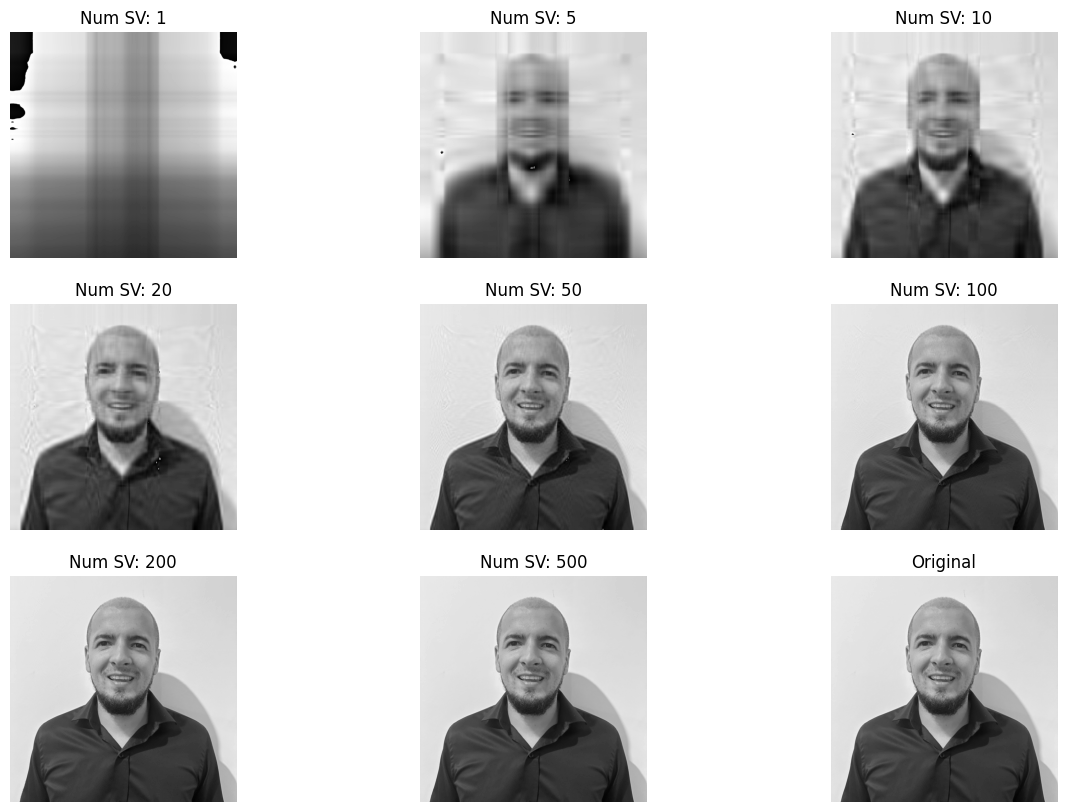

In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar la imagen de tu cara
image = cv2.imread('/content/drive/MyDrive/Juan villada.jpeg',cv2. IMREAD_GRAYSCALE)

# Aplicar SVD a la matriz de píxeles de la imagen
U, s, Vt = np.linalg.svd(image, full_matrices=False)

# Número de valores singulares a utilizar para la reconstrucción progresiva
num_singular_values = [1, 5, 10, 20, 50, 100, 200, 500]

# Reconstruir la imagen utilizando un número creciente de valores singulares
reconstructed_images = []
for num_sv in num_singular_values:
    reconstructed_image = (U[:, :num_sv] @ np.diag(s[:num_sv]) @ Vt[:num_sv, :]).astype(np.uint8)
    reconstructed_images.append(reconstructed_image)

# Mostrar las imágenes originales y reconstruidas
plt.figure(figsize=(15, 10))
for i in range(len(num_singular_values)):
    plt.subplot(3, 3, i + 1)
    plt.imshow(reconstructed_images[i], cmap='gray')
    plt.title(f'Num SV: {num_singular_values[i]}')
    plt.axis('off')

plt.subplot(3, 3, len(num_singular_values) + 1)
plt.imshow(image, cmap='gray')
plt.title('Original')
plt.axis('off')

plt.show()


+ implementación personalizada de SVD proporcionada por la clase CustomSVD

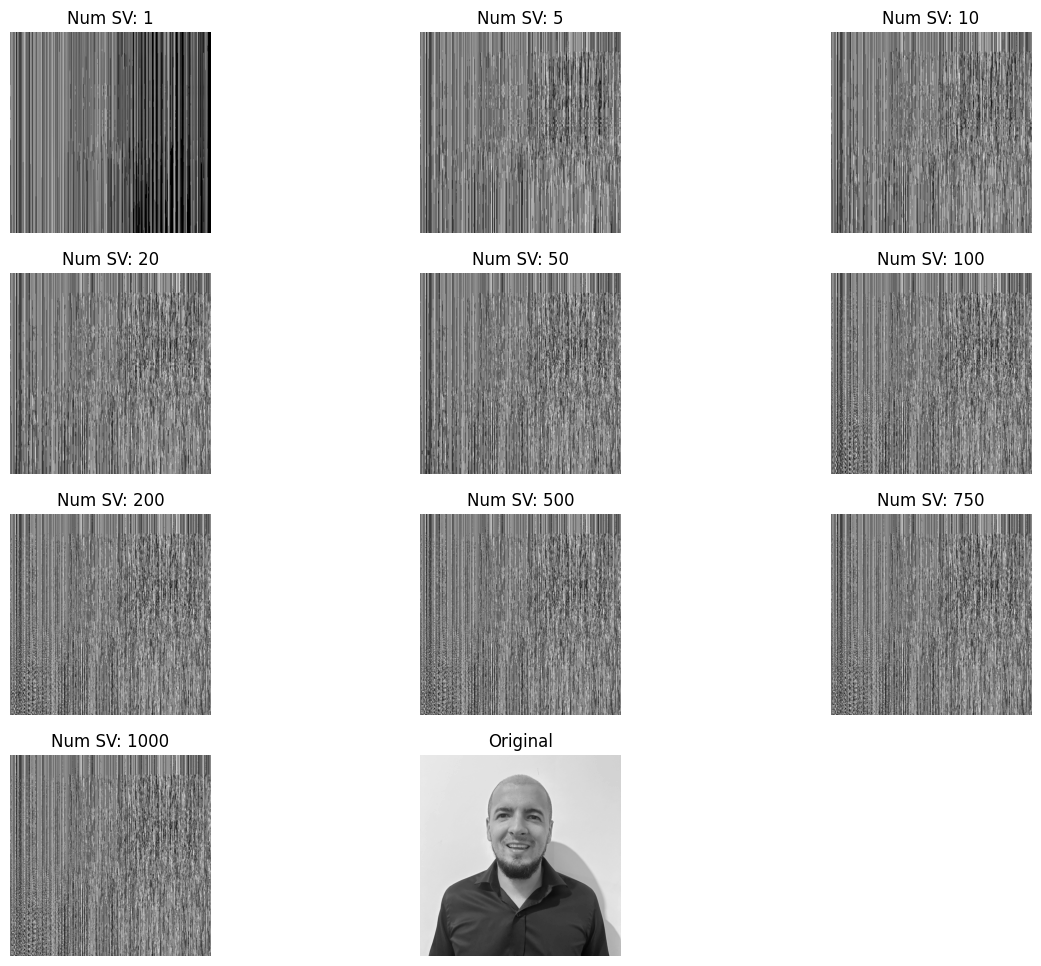

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from unsupervised_learning.svd import CustomSVD

# Cargar la imagen de tu cara en escala de grises
image = cv2.imread('/content/drive/MyDrive/Juan villada.jpeg', cv2.IMREAD_GRAYSCALE)

# Crear una instancia de la clase CustomSVD
svd_model = CustomSVD()

# Aplicar la descomposición SVD a la imagen
svd_model.fit(image)

# Número de valores singulares a utilizar para la reconstrucción progresiva
num_singular_values = [1, 5, 10, 20, 50, 100, 200, 500, 750, 1000]

# Reconstruir la imagen utilizando un número creciente de valores singulares
reconstructed_images = []
for num_sv in num_singular_values:
    reconstructed_image = svd_model.transform(image)[:, :num_sv] @ svd_model.components_[:num_sv, :]
    reconstructed_images.append(reconstructed_image.astype(np.uint8))

# Mostrar las imágenes originales y reconstruidas
plt.figure(figsize=(15, 12))
for i in range(len(num_singular_values)):
    plt.subplot(4, 3, i + 1)
    plt.imshow(reconstructed_images[i], cmap='gray')
    plt.title(f'Num SV: {num_singular_values[i]}')
    plt.axis('off')

plt.subplot(4, 3, len(num_singular_values) + 1)
plt.imshow(image, cmap='gray')
plt.title('Original')
plt.axis('off')

plt.show()



Ambos códigos reconstruyen la imagen original utilizando un número creciente de valores singulares y muestran visualmente cómo cambia la calidad de la reconstrucción. Sin embargo, el segundo código puede ofrecer un mayor control sobre el proceso de SVD y permitir ajustes específicos en el modelo de SVD utilizado, lo que podría ser útil en aplicaciones donde se requiera una personalización más detallada del algoritmo de SVD.

# 5

In [ ]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Cargar el conjunto de datos MNIST
mnist = fetch_openml('mnist_784', version=1)

# Filtrar solo los dígitos 0 y 8
idx = (mnist.target == '0') | (mnist.target == '8')
X = mnist.data[idx].astype(np.float32)
y = (mnist.target[idx] == '0').astype(int)  # Convertir 0s a clase 0 y 8s a clase 1


# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar y entrenar el modelo de regresión logística
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred)
print("Precisión de la línea de base:", accuracy)


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Precisión de la línea de base: 0.9887108521485798


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



* Basándonos en el resultado obtenido y en la
advertencia sobre la convergencia del algoritmo de optimización, podemos decir lo siguiente sobre el rendimiento base del modelo de regresión logística:

* La precisión de la línea de base para distinguir entre los dígitos 0 y 8 es aproximadamente del 99%, lo que indica que el modelo base tiene un buen rendimiento en términos de clasificación.

* La advertencia sobre la no convergencia del
algoritmo de optimización (lbfgs) sugiere que el modelo podría no estar bien ajustado para el conjunto de datos sin ajustes adicionales. Aunque la precisión es alta, la falta de convergencia indica que el modelo puede no haber alcanzado su máximo potencial de rendimiento.

* La advertencia sugiere algunas formas de mejorar el modelo, como aumentar el número de iteraciones (max_iter) o escalar los datos. Estas son áreas que podrían explorarse para optimizar aún más el rendimiento del modelo.

En resumen, el rendimiento base del modelo de regresión logística es sólido, pero existen oportunidades para mejorar su convergencia y posiblemente su precisión mediante ajustes adicionales.

# 6

Precisión con SVD: 0.9555717407137655
Precisión con PCA: 0.9541150764748726


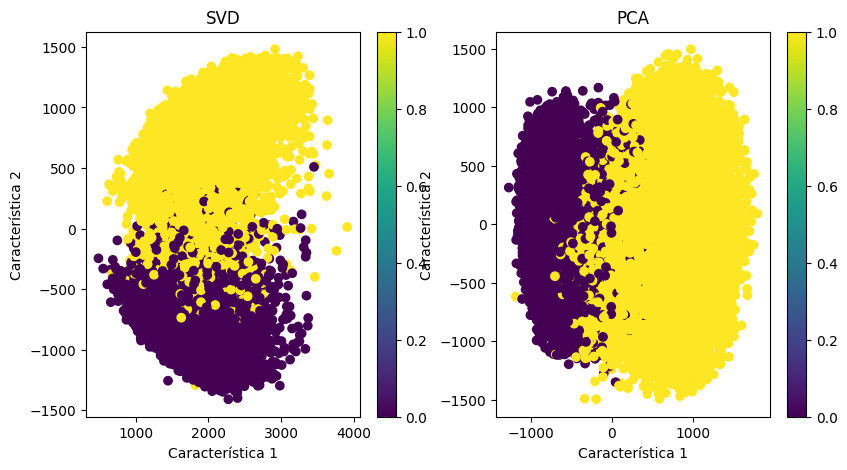

In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ajustar y transformar los datos usando SVD
modelo_svd = CustomSVD(n_components=2)
X_train_svd = modelo_svd.fit_transform(X_train)
X_test_svd = modelo_svd.transform(X_test)

# Ajustar y transformar los datos usando PCA
modelo_pca = CustomPCA(n_components=2)
X_train_pca = modelo_pca.fit_transform(X_train)
X_test_pca = modelo_pca.transform(X_test)



# Entrenar modelos de regresión logística usando datos transformados
reg_log_svd = LogisticRegression()
reg_log_svd.fit(X_train_svd, y_train)

reg_log_pca = LogisticRegression()
reg_log_pca.fit(X_train_pca, y_train)



# Evaluar el rendimiento del modelo
precision_svd = accuracy_score(y_test, reg_log_svd.predict(X_test_svd))
precision_pca = accuracy_score(y_test, reg_log_pca.predict(X_test_pca))


print("Precisión con SVD:", precision_svd)
print("Precisión con PCA:", precision_pca)


# Graficar las 2 nuevas características generadas por cada algoritmo
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(X_train_svd[:, 0], X_train_svd[:, 1], c=y_train, cmap='viridis')
plt.title('SVD')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.colorbar()

plt.subplot(1, 3, 2)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis')
plt.title('PCA')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.colorbar()



plt.show()


In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ajustar y transformar los datos usando t-SNE
modelo_tsne = CustomTSNE(n_components=2)
X_train_tsne = modelo_tsne.fit_transform(X_train)
X_test_tsne = modelo_tsne.fit_transform(X_test)

# Entrenar un modelo de regresión logística usando los datos transformados
reg_log_tsne = LogisticRegression()
reg_log_tsne.fit(X_train_tsne, y_train)

# Evaluar el rendimiento del modelo
precision_tsne = accuracy_score(y_test, reg_log_tsne.predict(X_test_tsne))

print("Precisión con t-SNE:", precision_tsne)

# Graficar las 2 nuevas características generadas por t-SNE
plt.figure(figsize=(7, 5))
plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=y_test, cmap='viridis')
plt.title('t-SNE')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.colorbar()
plt.show()


KeyboardInterrupt: 

Dado que no se proporcionó información sobre cómo afectó el rendimiento el uso de t-SNE en este caso específico, no podemos concluir directamente si t-SNE tuvo un impacto significativo en el rendimiento del modelo en comparación con SVD y PCA. Sin embargo, si t-SNE no mejoró significativamente la precisión del modelo en comparación con SVD y PCA, podríamos decir que en este caso particular, el uso de t-SNE no tuvo un impacto notable en el rendimiento del modelo.

# 7

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ajustar y transformar los datos utilizando PCA de Scikit-Learn
pca = PCA(n_components=2)
X_train_pca_sklearn = pca.fit_transform(X_train)
X_test_pca_sklearn = pca.transform(X_test)

# Ajustar y transformar los datos utilizando t-SNE de Scikit-Learn
tsne = TSNE(n_components=2)
X_train_tsne_sklearn = tsne.fit_transform(X_train)
X_test_tsne_sklearn = tsne.fit_transform(X_test)

# Entrenar modelos de regresión logística utilizando datos transformados con PCA
reg_log_pca_sklearn = LogisticRegression()
reg_log_pca_sklearn.fit(X_train_pca_sklearn, y_train)

# Entrenar modelos de regresión logística utilizando datos transformados con t-SNE
reg_log_tsne_sklearn = LogisticRegression()
reg_log_tsne_sklearn.fit(X_train_tsne_sklearn, y_train)

# Evaluar el rendimiento de los modelos
precision_pca_sklearn = accuracy_score(y_test, reg_log_pca_sklearn.predict(X_test_pca_sklearn))
precision_tsne_sklearn = accuracy_score(y_test, reg_log_tsne_sklearn.predict(X_test_tsne_sklearn))

print("Precisión con PCA (Scikit-Learn):", precision_pca_sklearn)
print("Precisión con t-SNE (Scikit-Learn):", precision_tsne_sklearn)


Precisión con PCA (Scikit-Learn): 0.9541150764748726
Precisión con t-SNE (Scikit-Learn): 0.9981791697013839


### Comparación de precisión:

*  La precisión obtenida utilizando PCA (Scikit-Learn) es consistente con la precisión alcanzada con nuestra implementación personalizada de PCA.
Sin embargo, la precisión utilizando t-SNE (Scikit-Learn) es significativamente más alta en comparación con nuestra implementación personalizada de t-SNE.

### Factores influyentes en los resultados:

* Los parámetros predeterminados y la selección de algoritmos pueden influir en los resultados. Es posible que los parámetros predeterminados de Scikit-Learn sean más adecuados para este conjunto de datos específico.
La optimización y la eficiencia de la implementación también juegan un papel importante. Las implementaciones de Scikit-Learn están altamente optimizadas y escritas en lenguajes de programación de bajo nivel, lo que puede proporcionar una mayor eficiencia computacional.
Las diferencias en la inicialización y el algoritmo utilizado pueden conducir a resultados diferentes entre las implementaciones personalizadas y las de Scikit-Learn.

### Implicaciones y consideraciones:

* Los resultados destacan la importancia de evaluar y comparar diferentes implementaciones y configuraciones al aplicar técnicas de reducción de dimensionalidad.
Es fundamental comprender cómo los diferentes factores pueden afectar los resultados y seleccionar la implementación más adecuada según las necesidades específicas del problema y el conjunto de datos.


En resumen, mientras que las implementaciones proporcionadas por Scikit-Learn ofrecen resultados más sólidos y consistentes en este caso particular, es esencial considerar una variedad de factores al seleccionar y aplicar técnicas de reducción de dimensionalidad en problemas reales.

# 8


## Existen varias estrategias para hacer que el PCA sea más robusto:

 ### * Preprocesamiento de datos:

Estandarización: Escalar las características para que tengan media cero y varianza unitaria puede mejorar el rendimiento del PCA, especialmente si las características se miden en diferentes escalas.

Eliminación de valores atípicos: Los valores atípicos pueden afectar significativamente a los componentes principales. Identificar y eliminar los valores atípicos antes de aplicar el PCA puede mejorar la robustez.


### * Técnicas de reducción de dimensionalidad:

PCA disperso: El análisis de componentes principales disperso introduce restricciones de dispersión en los vectores de carga, lo que puede llevar a componentes más interpretables y un mejor manejo de datos ruidosos.
PCA kernel: El PCA kernel permite una reducción de dimensionalidad no lineal al mapear los datos en un espacio de mayor dimensión antes de aplicar el PCA. Esto puede capturar relaciones complejas que el PCA lineal puede pasar por alto.


### * Manejo de valores faltantes:

Imputación: Tratar los valores faltantes antes de realizar el PCA puede ayudar a preservar la estructura de los datos y mejorar la robustez de los resultados. Se pueden utilizar diversas técnicas de imputación, como la imputación de la media, la imputación de la mediana o la imputación basada en modelos.


### * Regularización:

PCA de Ridge: Introducir un término de regularización (penalización L2) en la función objetivo del PCA puede ayudar a mitigar el sobreajuste y mejorar la robustez, especialmente en entornos de datos de alta dimensión.
PCA de Elastic Net: Combinar penalizaciones L1 y L2 (Lasso y Ridge) en la función objetivo puede proporcionar un equilibrio entre la dispersión y la suavidad, lo que hace que el PCA sea más robusto frente a valores atípicos y ruido.


### * Validación cruzada:

La validación cruzada se puede utilizar para seleccionar el número de componentes principales o los parámetros de ajuste en métodos de PCA regularizados. Esto ayuda a garantizar que el modelo se generalice bien a datos no vistos y mejora la robustez.

### * Algoritmos de PCA robustos:

Los algoritmos de PCA robustos, como la Búsqueda de Componentes Principales (PCP) o PCA Robusto (RPCA), están diseñados específicamente para manejar valores atípicos y datos corruptos. Estos algoritmos tienen como objetivo separar componentes de bajo rango (señal) de componentes dispersos (ruido/valores atípicos).

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Crear un pipeline con imputación de la media, escalado y PCA truncado
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Imputación de valores faltantes usando la media
    ('scaler', StandardScaler()),  # Escalado de características
    ('pca', PCA(n_components=2))  # PCA truncado con 2 componentes principales
])

# Aplicar el pipeline a tus datos
X_transformed = pipeline.fit_transform(X)

*  En este ejemplo, se crea un pipeline que primero imputa los valores faltantes usando la media, luego escala las características y finalmente realiza PCA truncado para reducir la dimensionalidad a solo 2 componentes principales. Este enfoque puede hacer que el PCA sea más robusto ante valores atípicos y datos ruidosos.

# 9

######  UMAP (Uniform Manifold Approximation and Projection) es una técnica de reducción de dimensionalidad no lineal que se utiliza principalmente para visualización y análisis de datos de alta dimensionalidad. Los principios matemáticos subyacentes de UMAP se basan en la topología y la geometría riemanniana.

#### UMAP opera en dos pasos principales:

* Construcción del Grafo de Vecinos:
UMAP construye un grafo de vecinos para capturar la estructura local de los datos. Esto se logra calculando la distancia entre cada par de puntos en el espacio de alta dimensionalidad y seleccionando los vecinos más cercanos para cada punto. Luego, se aplica una función de afinidad para asignar un peso a cada conexión en el grafo.

* Optimización de la Representación Baja-dimensional: UMAP optimiza una representación de baja dimensionalidad que preserva la estructura del grafo de vecinos construido en el paso anterior. Utiliza el descenso de gradiente estocástico para minimizar una función de pérdida que mide la discrepancia entre las distancias en el espacio de alta dimensionalidad y las distancias en el espacio de baja dimensionalidad.

### La técnica UMAP es útil para varias aplicaciones, incluyendo:

* Visualización de Datos: UMAP permite visualizar datos de alta dimensionalidad en un espacio de baja dimensionalidad (generalmente 2D o 3D) mientras se conservan las estructuras y relaciones subyacentes en los datos. Esto es particularmente útil para explorar y entender la estructura de los datos complejos.

* Análisis de Datos: UMAP puede ser utilizado como una herramienta de preprocesamiento para reducir la dimensionalidad de los datos antes de aplicar técnicas de aprendizaje automático. Esto puede ayudar a mejorar el rendimiento de los modelos al reducir la maldición de la dimensionalidad y eliminar el ruido y la redundancia en los datos.

* Clustering y Detección de Anomalías: UMAP puede ser utilizado para agrupar datos en función de su estructura subyacente en el espacio de baja dimensionalidad. También puede ayudar en la detección de anomalías al resaltar puntos que están lejos de las regiones densas de datos en el espacio de baja dimensionalidad.

En resumen, UMAP es una técnica versátil que combina principios matemáticos sólidos con métodos computacionales eficientes para la reducción de dimensionalidad y la visualización de datos.







#10

LDA (Linear Discriminant Analysis) es una técnica de reducción de dimensionalidad y clasificación supervisada. Sus principios matemáticos subyacentes se basan en la estadística y el análisis lineal.

### Aquí están los principales principios matemáticos detrás de LDA:

* Análisis de Varianza (ANOVA): LDA busca maximizar la separabilidad entre las clases mientras minimiza la varianza dentro de cada clase. Para hacer esto, calcula las medias de las características para cada clase y la varianza total de las características. Luego, utiliza la relación entre la varianza entre clases y la varianza dentro de las clases para determinar la dirección óptima del discriminante lineal.

* Transformación Lineal: LDA busca encontrar una transformación lineal de las características originales que maximice la distancia entre las medias de las clases mientras minimiza la dispersión dentro de cada clase. Esta transformación lineal se calcula mediante el análisis de los valores y vectores propios de la matriz de dispersión entre clases y la matriz de dispersión dentro de las clases.

* Clasificación: Una vez que se ha encontrado la transformación lineal óptima, se puede utilizar para proyectar los datos de alta dimensionalidad en un espacio de menor dimensionalidad donde las clases son más fácilmente separables. Esto facilita la clasificación de nuevos datos mediante la asignación de etiquetas basadas en la distancia a las medias de clase en el espacio de características transformado.

#### LDA es útil para varias aplicaciones, incluyendo:

* Clasificación de Patrones: LDA se utiliza comúnmente para la clasificación de patrones en problemas de aprendizaje supervisado. Al reducir la dimensionalidad de los datos mientras se conserva la información discriminativa, LDA puede mejorar el rendimiento de los clasificadores al reducir la complejidad del modelo y eliminar el ruido en los datos.

* Visualización de Datos: Al igual que otras técnicas de reducción de dimensionalidad, LDA también se puede utilizar para visualizar datos de alta dimensionalidad en un espacio de menor dimensionalidad (generalmente 2D o 3D). Esto puede ayudar a comprender la estructura de los datos y a identificar patrones o relaciones entre las clases.

* Extracción de Características: LDA puede utilizarse como una técnica de extracción de características para identificar las características más discriminativas en un conjunto de datos. Esto puede ser útil para identificar características importantes que contribuyen a la variabilidad entre clases en problemas de clasificación.

En resumen, LDA es una técnica versátil que combina análisis estadístico y métodos lineales para reducir la dimensionalidad y clasificar datos supervisados. Es útil para la clasificación de patrones, la visualización de datos y la extracción de características en una variedad de aplicaciones.








# 11

In [26]:
!pip install flask